# **02 - Data Visualization**

## Objectives

**Address Business Requirement 1:**
* The client is keen on conducting a study to visually differentiate between mildewed cherry leaves and healthy leaves.

## Inputs
* inputs/cherry-leaves/leaf_images/train
* inputs/cherry-leaves/leaf_images/validation
* inputs/cherry-leaves/leaf_images/test

## Outputs
* Image shape embeddings pickle file
* Plot depicting the mean and variability of images per label
* Visual representation highlighting the contrast between healthy and powdery leaves images
* Generate code to fulfill Business Requirement 1 and construct an image montage for integration into the Streamlit dashboard.et



---

# Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

# Set working directory

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspaces/Code-Institute-Project-5/')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspaces/Code-Institute-Project-5'

# Setting input directory

These variables define the paths for the training, validation, and test sets within the 'mildew_dataset' directory containing cherry leaves images.

In [5]:
my_data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

# Setting output directory

These lines of code define a version ('v1') and create a corresponding file path within the 'outputs' directory, checking if the version already exists, and if not, creating a new version directory.

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


# Set labels

These lines of code retrieve the list of labels from the 'train_path' directory containing images of cherry leaves and then print the obtained labels.

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['powdery_mildew', 'healthy']


---

# Data visualisation of image data

## Image shape

These code lines iterate through images in the 'train_path' directory, extracting their dimensions, and then visualize a scatter plot of image widths against heights. Additionally, it calculates and displays the average width and height of the images.

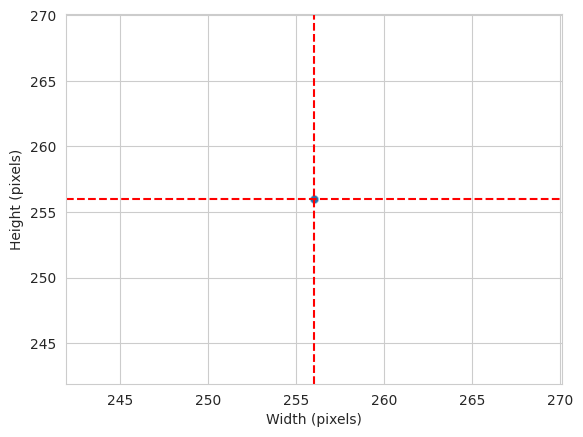

Width average: 256 
Height average: 256


In [8]:
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

Defining the 'image_shape' variable, representing the average dimensions (height, width, and color channels) of the cherry leaf images in the training set.

In [9]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(256, 256, 3)

Joblib is used to save the 'image_shape' variable, representing the average dimensions of cherry leaf images, into a pickle file named 'image_shape.pkl' within the specified 'file_path'.

In [10]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

# Average and variability of images per label

## Function to load images in an array (tensor)

This function, utilizing the TensorFlow Keras library, loads a limited number of resized images from specified labels and converts them into arrays, ensuring normalization if pixel values are greater than 1, and returns the image array (`X`) and corresponding labels (`y`).

In [11]:
from tensorflow.keras.preprocessing import image


def load_image_as_array(my_data_dir, new_size=(50, 50), n_images_per_label=20):

    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(my_data_dir + '/' + label):
            # n_images_per_label: we set a limit, since it may take too much time
            if counter < n_images_per_label:

                img = image.load_img(
                    my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)
                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:
                    img_resized = image.img_to_array(img)

                X = np.append(X, img_resized).reshape(-1,
                                                      new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1

    return X, y

## Load image shapes and labels in an array

In [12]:
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print(X.shape, y.shape)

(60, 256, 256, 3) (60,)


## Plot and save mean and variability of images per label


This function iterates through unique labels in the dataset, calculates the mean and standard deviation for images belonging to each label, and generates a figure displaying the average and variability images for each label. 

In [13]:
def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):
    """
    The pseudo-code for the function is:
    * Loop over all labels
    * Subset an array for a given label
    * Calculate the mean and standard deviation
    * Create a figure displaying the mean and variability of images
    * Save the image
    """

    for label_to_display in np.unique(y):
        sns.set_style("white")

        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap='gray')
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img, cmap='gray')

        if save_image:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png",
                        bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")

Utilizing the `plot_mean_variability_per_labels` function to generate and save figures depicting the average and variability images for each unique label in the dataset, based on the provided image data (`X`) and corresponding labels (`y`).

==== Label healthy ====
Image Shape: (256, 256, 3)
==== Label powdery_mildew ====
Image Shape: (256, 256, 3)


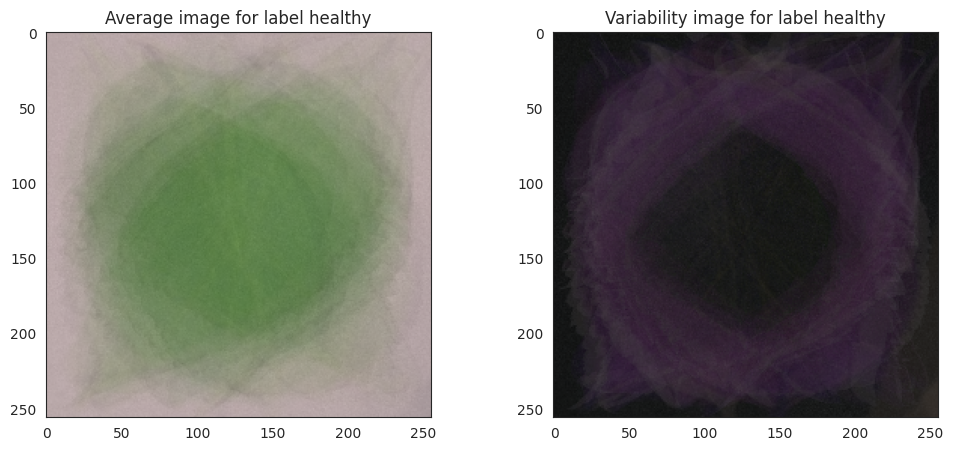

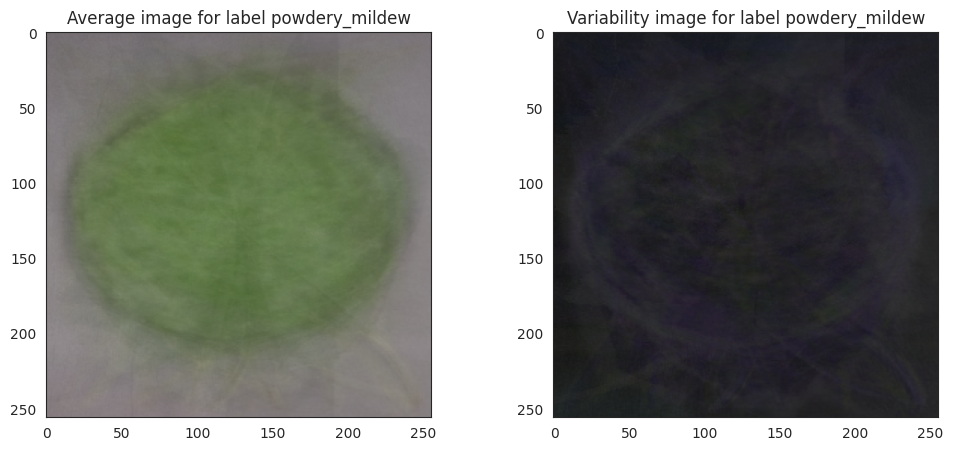

In [14]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)

# Difference between average mildew-contained and average uninfected leaf images

These functions, `subset_image_label` and `diff_bet_avg_image_labels_data_as_array`, collectively serve to subset images for a specified label, calculate the mean and difference between averages for two given labels, and visualize the resulting images. Additionally, the third function provides an option to save the generated figure if specified.

In [15]:
def subset_image_label(X, y, label_to_display):
    y = y.reshape(-1, 1, 1)
    boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
    df = X[boolean_mask]
    return df


def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20, 5), save_image=False):
    """
    Checks if the labels exist in the set of unique labels
    Calculates the mean and difference for label1 and label2
    Plots a chart and saves it if save_image=True
    """
    sns.set_style("white")

    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(
            f"Either label {label} or label {label_2}, are not in {np.unique(y)} ")
        return

    # calculate mean from label1
    images_label = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label, axis=0)

    # calculate mean from label2
    images_label = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label, axis=0)

    # calculate difference and plot difference, avg label1 and avg label2
    difference_mean = label1_avg - label2_avg
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].imshow(label1_avg, cmap='gray')
    axes[0].set_title(f'Average {label_1}')
    axes[1].imshow(label2_avg, cmap='gray')
    axes[1].set_title(f'Average {label_2}')
    axes[2].imshow(difference_mean, cmap='gray')
    axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')
    if save_image:
        plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()

Utilizes the `diff_bet_avg_image_labels_data_as_array` function to calculate and visualize the difference between the average images of the 'Parasitized' and 'Uninfected' labels in the dataset, based on the provided image data (`X`) and corresponding labels (`y`). The resulting figure is saved as an image file if the `save_image` parameter is set to `True`.

In [16]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='Parasitized', label_2='Uninfected',
                                        figsize=(12, 10),
                                        save_image=True
                                        )

Either label healthy or label Uninfected, are not in ['healthy' 'powdery_mildew'] 


# Image Montage

In [17]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def subset_image_label(X, y, label_to_display):
    """
    Subset an array of images by label.

    Parameters:
    - X: Input array of images.
    - y: Labels corresponding to the images.
    - label_to_display: The label to subset by.

    Returns:
    - df: Subset of images with the specified label.
    """
    y = y.reshape(-1, 1, 1)
    boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
    df = X[boolean_mask]
    return df

def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20, 5), save_image=False):
    """
    Calculate the difference between average images of two labels and optionally save the result as an image.

    Parameters:
    - X: Input array of images.
    - y: Labels corresponding to the images.
    - label_1: First label for comparison.
    - label_2: Second label for comparison.
    - figsize: Tuple specifying the figure size (width, height).
    - save_image: Boolean to indicate whether to save the difference image.

    Returns:
    None
    """
    sns.set_style("white")

    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(f"Either label {label_1} or label {label_2} are not in {np.unique(y)}")
        return

    # Calculate mean from label_1
    images_label_1 = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label_1, axis=0)

    # Calculate mean from label_2
    images_label_2 = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label_2, axis=0)

    # Calculate the difference and plot the difference, average label_1, and average label_2
    difference_mean = label1_avg - label2_avg
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].imshow(label1_avg, cmap='gray')
    axes[0].set_title(f'Average {label_1}')
    axes[1].imshow(label2_avg, cmap='gray')
    axes[1].set_title(f'Average {label_2}')
    axes[2].imshow(difference_mean, cmap='gray')
    axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')

    if save_image:
        plt.savefig(f"avg_diff.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


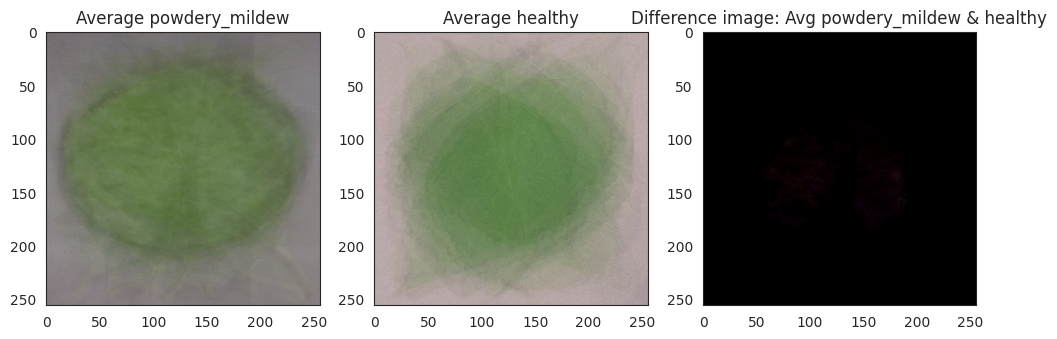

In [18]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='powdery_mildew', label_2='healthy',
                                        figsize=(12, 10),
                                        save_image=True
                                        )

# Conclusions

* The distribution and frequency of labels were computed for each dataset.
* 
Image shape embeddings were stored in a pickle file
* 
Average images were computed and saved for each labe
* .
Image Montages were generated for each label.

# Next Steps

* Implement image augmentation techniques
* Develop a machine learning (ML) model
* Train the ML mod
* Evaluate the performance of the modeldelel.el.